In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('medical_examination.csv')

In [49]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [5]:
#Inicializar la nueva columna en 0
df['overweight'] = np.where(((df['weight']) / np.square(df['height'] / 100)) > 25, 1, 0)



In [6]:
df['cholesterol'] = np.where(df['cholesterol'] == 1 , 0, 1)
df['gluc'] = np.where(df['gluc'] == 1 , 0, 1)


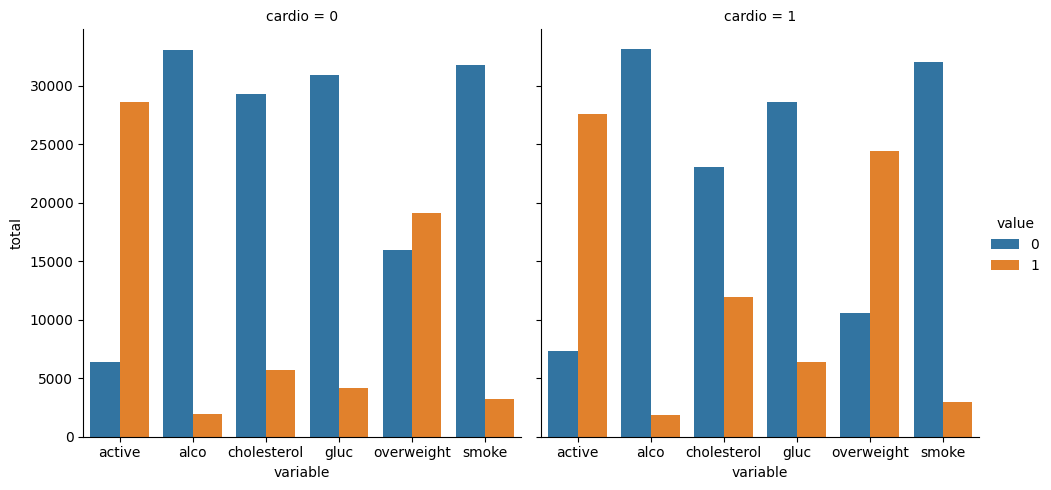

In [7]:
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

    # 6
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio','variable','value'], as_index= False).count()

    # 7
    fig = sns.catplot( x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

    # 9
    fig.savefig('catplot.png')
    return fig
draw_cat_plot()

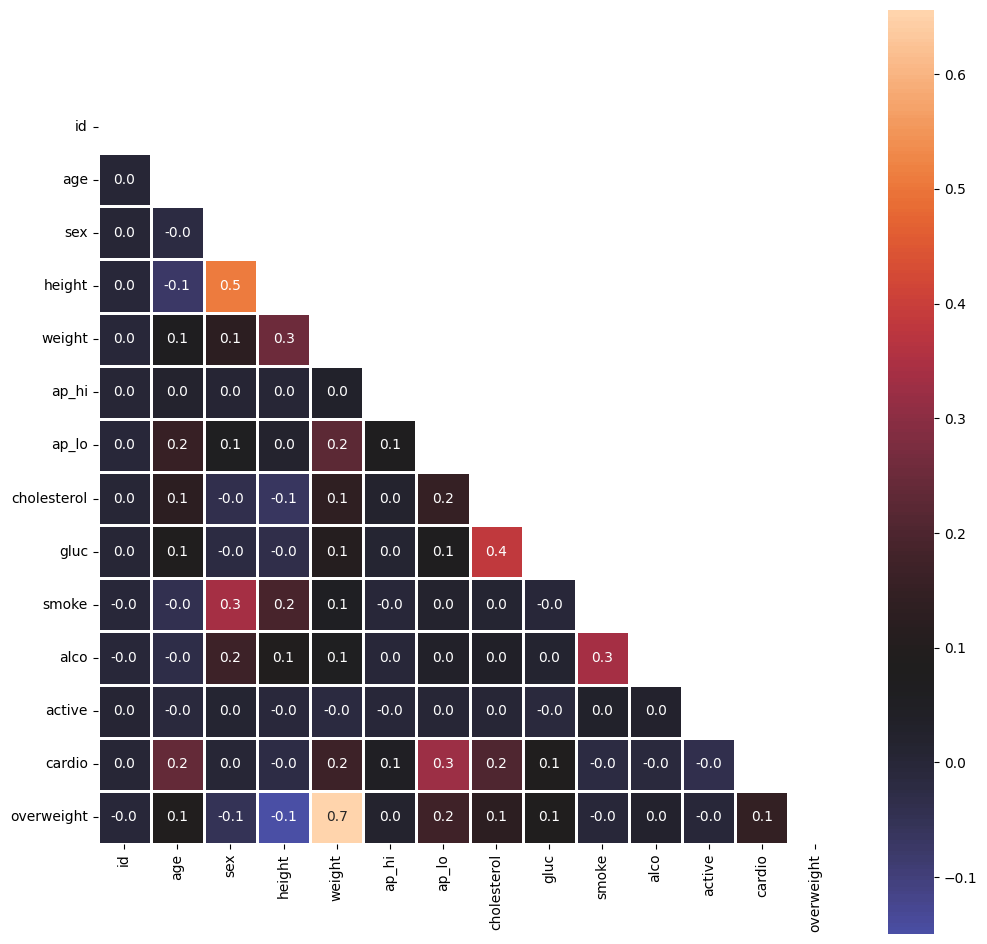

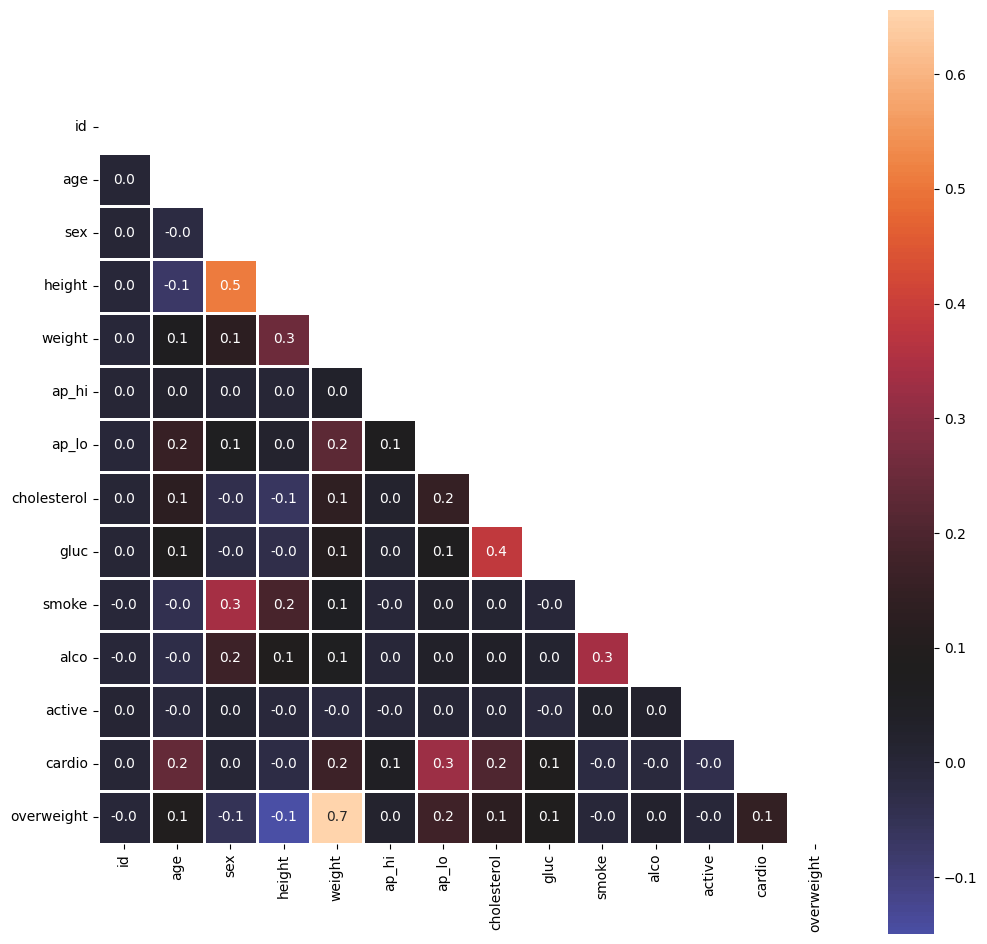

In [16]:
# 10
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(corr)

    # 14
    fig, ax = plt.subplots(figsize=(12,12))

    # 15
    sns.heatmap(corr,linewidths= 1,annot=True,square= True,fmt='.1f',center= 0.08,mask=mask,cbar={'shrink':0.5})

    # 16
    fig.savefig('heatmap.png')
    return fig
draw_heat_map()
